<a href="https://colab.research.google.com/github/fares-mldev/uns-pdi2021/blob/main/tp3/PDI_TP3_Aritmetica_de_pixeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PDI TP 3 - Aritmetica de pixeles


La actividad propuesta debe permitir seleccionar dos imágenes y con estas poder acceder a un menú que permita realizar las siguientes operaciones entre estas:

En espacio RGB:
Sumas y restas: clampeada y promediada

Es espacio YIQ:
Sumas y Restas: clampeada, promediada, if-ligther, if-darker

El resultado de estas se debe guardar como una nueva imagen.
Se deben mostrar los resultados de todas las operaciones mencionadas.
Nota: leer cuidadosamente en la teoría las pautas que debe tener cada una de estas operaciones. Las operaciones deben ser realizadas como funciones desarrolladas por ustedes NO mediante funciones de librerías que ya las realicen.

#Code

In [1]:
#@title Imports

# Import numpy
import numpy as np

# Import imageio
import imageio as iio

# Import matplotlib
import matplotlib.pyplot as plt

In [2]:
#@title Image utils

# Images URL list 
url_dict = {}
url_dict["tree"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/img/1_Tree.jpg"
url_dict["jupiter"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/img/2_jupiter.jpg"
url_dict["water"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/img/3_water.jpg"
url_dict["dunes"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/img/4_dunes.jpg"
url_dict["mountains"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/img/5_mountains.jpg"

def get_image(image: str) -> np.array:
    '''
    Downloads specified image from the web and returns it as a numpy array
    '''
    # Read image from file
    img = iio.imread(url_dict[image])

    # Return image
    return np.asarray(img)

def describe_img(img: np.array):
  '''
  Prints image properties
  '''
  print("Image shape (height,width,channels):", img.shape)
  print("Element type:", img.dtype)
  print("Total number of pixels:",img.size)
  print("Pixels per channel:", int(img.size/img.shape[2]))
  print("min-max value of channel 0:",img[:,:,0].min(),img[:,:,0].max())
  print("min-max value of channel 1:",img[:,:,1].min(),img[:,:,1].max())
  print("min-max value of channel 2:",img[:,:,2].min(),img[:,:,2].max())

def plot_img(img: np.array):
  '''
  Plots image using matplotlib 
  '''

  plt.figure(figsize=(10, 10))
  plt.imshow(img)


In [3]:
#@title Color space transformation utils

# RGB to YIQ space transformation matrix
rgb_to_yiq = [[0.299, 0.587, 0.114],
              [0.595716, -0.274453, -0.321263],
              [0.211456, -0.522591, 0.311135]]

# YIQ to RGB space transformation matrix
yiq_to_rgb = [[1, 0.9663, 0.6210],
              [1, -0.2721, -0.6474],
              [1, -1.1070, 1.7046]]

def convert_rgb2yiq(img_rgb: np.array) -> np.array:
  '''
  Converts an RGB image to YIQ space
  '''
  
  # Normalize image
  img_rgb_n = img_rgb.astype(np.float64) / 255.0  
  
  # Apply transformation
  img_yiq = np.dot(img_rgb_n,rgb_to_yiq)

  # Return YIQ image
  return img_yiq

def convert_yiq2rgb(img_yiq: np.array) -> np.array:
  '''
  Converts an YIQ image to RGB space
  '''

  # Apply transformation
  img_rgb_n= np.dot(img_yiq,yiq_to_rgb)
  
  # Clip image 
  img_rgb = img_rgb_n.clip(0,1) * 255.0
  
  # Return RGB image
  return img_rgb.astype(np.uint8) 

In [4]:
#@title RGB image arithmetic utils

def sum_rgb_clip(im1: np.array,im2: np.array) -> np.array:
  '''
  Takes two images im1, im2 and computes the sum clipping the result to 0-255 
  '''
  ret_sum = im1.astype(np.float64) + im2.astype(np.float64)
  ret_sum = np.clip(ret_sum,0,255.0) 
  return ret_sum.astype(np.uint8)

def sum_rgb_avg(im1: np.array,im2: np.array) -> np.array:
  '''
  Takes two images im1, im2 and computes the sum taking the average of them
  '''
  ret_sum = im1.astype(np.float64) *  0.5 + im2.astype(np.float64) *  0.5
  return ret_sum.astype(np.uint8)

def diff_rgb_clip(im1: np.array,im2: np.array) -> np.array:
  '''
  Takes two images im1, im2 and computes the difference clipping the result to 0-255 
  '''
  ret_sum = im1.astype(np.float64) - im2.astype(np.float64) 
  ret_sum = np.clip(ret_sum,0,255.0) 
  return ret_sum.astype(np.uint8)

def diff_rgb_avg(im1: np.array,im2: np.array) -> np.array:
  '''
  Takes two images im1, im2 and computes the sum taking the average of them
  '''
  ret_sum = im1.astype(np.float64) * 0.5 - im2.astype(np.float64) * 0.5 + 125.0
  return ret_sum.astype(np.uint8)


In [5]:
#@title YIQ image arithmetic utils

def sum_yiq_clip(im1: np.array,im2: np.array) -> np.array:
  '''
  Takes two images im1, im2 and computes the cuasi-sum in the YIQ color space clipping the result to 0-255 
  '''
  # To prevent division by zero 
  small_value = 0.001

  # Convert both images to YIQ color space
  im1_yiq = convert_rgb2yiq(im1)
  im2_yiq = convert_rgb2yiq(im2)

  # Create return image
  ret_img_yiq = np.empty_like(im1_yiq)
  
  # Calculate Luminance
  # Y = Y1 + Y2  
  ret_img_yiq[:,:,0] = im1_yiq[:,:,0] + im2_yiq[:,:,0]
  # Clip Luminance
  ret_img_yiq[:,:,0] = np.clip(ret_img_yiq[:,:,0] ,0,1.0) 

  # Calculate Chrominances
  #I = (Y1 * I1 + Y2 * I2) / (Y1 + Y2) 
  ret_img_yiq[:,:,1] = (im1_yiq[:,:,0] * im1_yiq[:,:,1] +  im2_yiq[:,:,0] * im2_yiq[:,:,1]) / (im1_yiq[:,:,0] + im1_yiq[:,:,0] + small_value)
  #Q := (Y1 * Q1 + Y2 * Q2) / (Y1 + Y2) 
  ret_img_yiq[:,:,2] = (im1_yiq[:,:,0] * im1_yiq[:,:,2] +  im2_yiq[:,:,0] * im2_yiq[:,:,2]) / (im1_yiq[:,:,0] + im1_yiq[:,:,0] + small_value)

  # Convert to RGB and return result
  ret_img = convert_yiq2rgb(ret_img_yiq)
  return ret_img

def sum_yiq_avg(im1: np.array,im2: np.array) -> np.array:
  '''
  Takes two images im1, im2 and computes the cuasi-sum in the YIQ color space clipping the result to 0-255 
  '''
  # To prevent division by zero 
  small_value = 0.001

  # Convert both images to YIQ color space
  im1_yiq = convert_rgb2yiq(im1)
  im2_yiq = convert_rgb2yiq(im2)

  # Create return image
  ret_img_yiq = np.empty_like(im1_yiq)
  
  # Calculate Luminance
  # Y = Y1 * 0.5 + Y2 * 0.5   
  ret_img_yiq[:,:,0] = im1_yiq[:,:,0] * 0.5 + im2_yiq[:,:,0] * 0.5
  
  # Calculate Chrominances
  #I = (Y1 * I1 + Y2 * I2) / (Y1 + Y2) 
  ret_img_yiq[:,:,1] = (im1_yiq[:,:,0] * im1_yiq[:,:,1] +  im2_yiq[:,:,0] * im2_yiq[:,:,1]) / (im1_yiq[:,:,0] + im1_yiq[:,:,0] + small_value)
  #Q := (Y1 * Q1 + Y2 * Q2) / (Y1 + Y2) 
  ret_img_yiq[:,:,2] = (im1_yiq[:,:,0] * im1_yiq[:,:,2] +  im2_yiq[:,:,0] * im2_yiq[:,:,2]) / (im1_yiq[:,:,0] + im1_yiq[:,:,0] + small_value)

  # Convert to RGB and return result
  ret_img = convert_yiq2rgb(ret_img_yiq)
  return ret_img

def diff_yiq_clip(im1: np.array,im2: np.array) -> np.array:
  '''
  Takes two images im1, im2 and computes the cuasi-differnce in the YIQ color space clipping the result to 0-255 
  '''
  # To prevent division by zero 
  small_value = 0.001

  # Convert both images to YIQ color space
  im1_yiq = convert_rgb2yiq(im1)
  im2_yiq = convert_rgb2yiq(im2)

  # Create return image
  ret_img_yiq = np.empty_like(im1_yiq)
  
  # Calculate Luminance
  # Y = Y1 - Y2  
  ret_img_yiq[:,:,0] = im1_yiq[:,:,0] - im2_yiq[:,:,0]
  # Clip Luminance
  ret_img_yiq[:,:,0] = np.clip(ret_img_yiq[:,:,0] ,0,1.0) 

  # Calculate Chrominances
  #I = (Y1 * I1 - Y2 * I2) / (Y1 + Y2) 
  ret_img_yiq[:,:,1] = (im1_yiq[:,:,0] * im1_yiq[:,:,1] -  im2_yiq[:,:,0] * im2_yiq[:,:,1]) / (im1_yiq[:,:,0] + im1_yiq[:,:,0] + small_value)
  #Q := (Y1 * Q1 - Y2 * Q2) / (Y1 + Y2) 
  ret_img_yiq[:,:,2] = (im1_yiq[:,:,0] * im1_yiq[:,:,2] -  im2_yiq[:,:,0] * im2_yiq[:,:,2]) / (im1_yiq[:,:,0] + im1_yiq[:,:,0] + small_value)

  # Convert to RGB and return result
  ret_img = convert_yiq2rgb(ret_img_yiq)
  return ret_img

def diff_yiq_avg(im1: np.array,im2: np.array) -> np.array:
  '''
  Takes two images im1, im2 and computes the cuasi-sum in the YIQ color space clipping the result to 0-255 
  '''
  # To prevent division by zero 
  small_value = 0.001

  # Convert both images to YIQ color space
  im1_yiq = convert_rgb2yiq(im1)
  im2_yiq = convert_rgb2yiq(im2)

  # Create return image
  ret_img_yiq = np.empty_like(im1_yiq)
  
  # Calculate Luminance
  # Y = Y1 * 0.5 - Y2 * 0.5 + 0.5
  ret_img_yiq[:,:,0] = im1_yiq[:,:,0] * 0.5 - im2_yiq[:,:,0] * 0.5 + 0.5
  
  # Calculate Chrominances
  #I = (Y1 * I1 - Y2 * I2) / (Y1 + Y2) 
  ret_img_yiq[:,:,1] = (im1_yiq[:,:,0] * im1_yiq[:,:,1] - im2_yiq[:,:,0] * im2_yiq[:,:,1]) / (im1_yiq[:,:,0] + im1_yiq[:,:,0] + small_value)
  #Q := (Y1 * Q1 - Y2 * Q2) / (Y1 + Y2) 
  ret_img_yiq[:,:,2] = (im1_yiq[:,:,0] * im1_yiq[:,:,2] - im2_yiq[:,:,0] * im2_yiq[:,:,2]) / (im1_yiq[:,:,0] + im1_yiq[:,:,0] + small_value)

  # Convert to RGB and return result
  ret_img = convert_yiq2rgb(ret_img_yiq)
  return ret_img

In [6]:
#@title Other YIQ image arithmetic utils

def sum_yiq_il(im1: np.array,im2: np.array) -> np.array:
  '''
  Takes two images im1, im2 and computes the cuasi-sum in the YIQ color space clipping the result to 0-255 
  '''
  # To prevent division by zero 
  small_value = 0.001

  # Convert both images to YIQ color space
  im1_yiq = convert_rgb2yiq(im1)
  im2_yiq = convert_rgb2yiq(im2)

  # Create return image
  ret_img_yiq = np.empty_like(im1_yiq)
  
  for row in range(ret_img_yiq.shape[0]):
    for col in range(ret_img_yiq.shape[1]):
      if im1_yiq[row,col,0] >=  im2_yiq[row,col,0]:
        ret_img_yiq[row,col,:] = im1_yiq[row,col,:]
      else:
        ret_img_yiq[row,col,:] = im2_yiq[row,col,:]
 
  # Convert to RGB and return result
  ret_img = convert_yiq2rgb(ret_img_yiq)
  return ret_img

def sum_yiq_id(im1: np.array,im2: np.array) -> np.array:
  '''
  Takes two images im1, im2 and computes the cuasi-sum in the YIQ color space clipping the result to 0-255 
  '''
  # To prevent division by zero 
  small_value = 0.001

  # Convert both images to YIQ color space
  im1_yiq = convert_rgb2yiq(im1)
  im2_yiq = convert_rgb2yiq(im2)

  # Create return image
  ret_img_yiq = np.empty_like(im1_yiq)
  
  for row in range(ret_img_yiq.shape[0]):
    for col in range(ret_img_yiq.shape[1]):
      if im1_yiq[row,col,0] <=  im2_yiq[row,col,0]:
        ret_img_yiq[row,col,:] = im1_yiq[row,col,:]
      else:
        ret_img_yiq[row,col,:] = im2_yiq[row,col,:]
 
  # Convert to RGB and return result
  ret_img = convert_yiq2rgb(ret_img_yiq)
  return ret_img



In [7]:
#@title Plot utilities { run: "auto" }

def plot_outputs(outputs: dict):
  
  # Create figure
  fig, axes = plt.subplots(1, len(outputs))
  fig.set_size_inches(20, 10)

  # Initialize filename
  fn = "Output"

  # Iterate over outputs
  for idx,output in enumerate(outputs):
    axes[idx].imshow(outputs[output])
    axes[idx].set_title(output)
    fn += "_" + output 

  # Write results to file
  fig.savefig(fn)


#Results

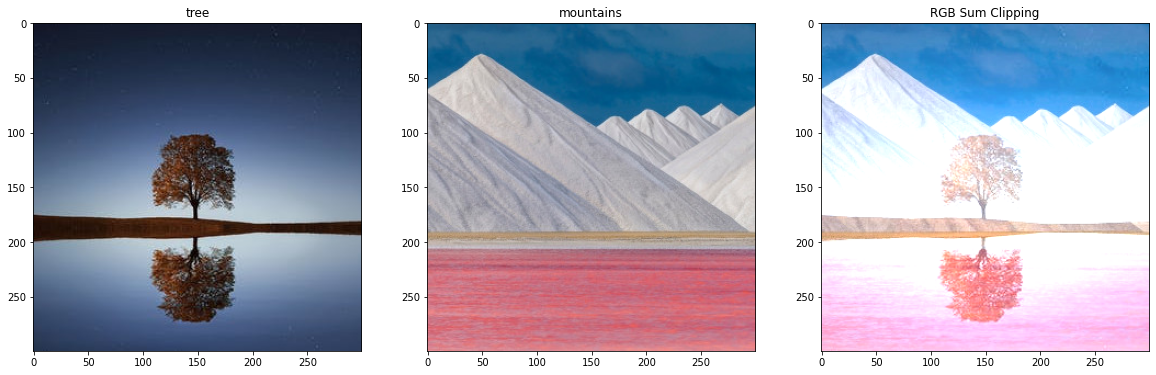

In [8]:
#@title RGB Sum Operations { run: "auto" }

image1 = "tree" #@param ["tree","jupiter","water","dunes","mountains"]
image2 = "mountains" #@param ["tree","jupiter","water","dunes","mountains"]
operation = "Clipping" #@param ["Clipping","Average"]

outputs = {}

# Load images
outputs[image1] = get_image(image1)
outputs[image2] = get_image(image2)

# Operation description
output = "RGB Sum " + operation

# Select operation
if operation == "Clipping":
  outputs[output] = sum_rgb_clip(outputs[image1],outputs[image2]) 

if operation == "Average":
  outputs[output] = sum_rgb_avg(outputs[image1],outputs[image2]) 

plot_outputs(outputs)


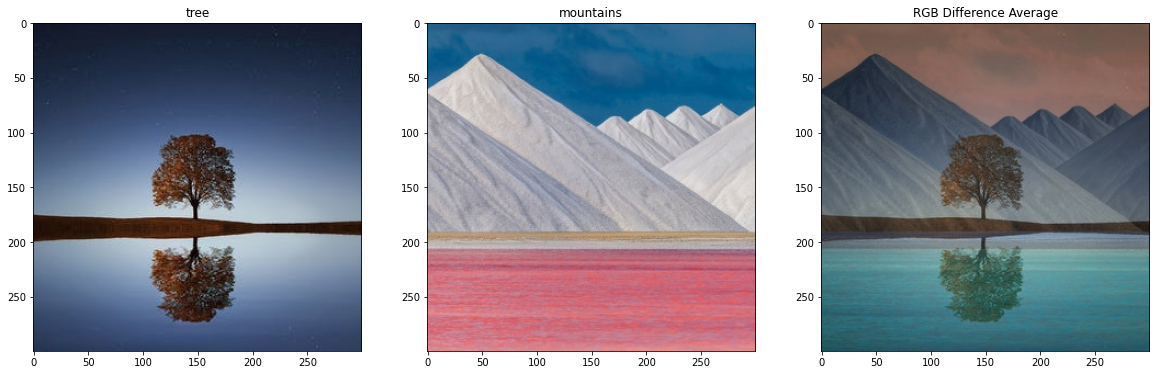

In [9]:
#@title RGB Difference Operations { run: "auto" }

image1 = "tree" #@param ["tree","jupiter","water","dunes","mountains"]
image2 = "mountains" #@param ["tree","jupiter","water","dunes","mountains"]
operation = "Average" #@param ["Clipping","Average"]

outputs = {}

# Load images
outputs[image1] = get_image(image1)
outputs[image2] = get_image(image2)

# Operation description
output = "RGB Difference " + operation

# Select operation
if operation == "Clipping":
  outputs[output] = diff_rgb_clip(outputs[image1],outputs[image2]) 

if operation == "Average":
  outputs[output] = diff_rgb_avg(outputs[image1],outputs[image2]) 

plot_outputs(outputs)


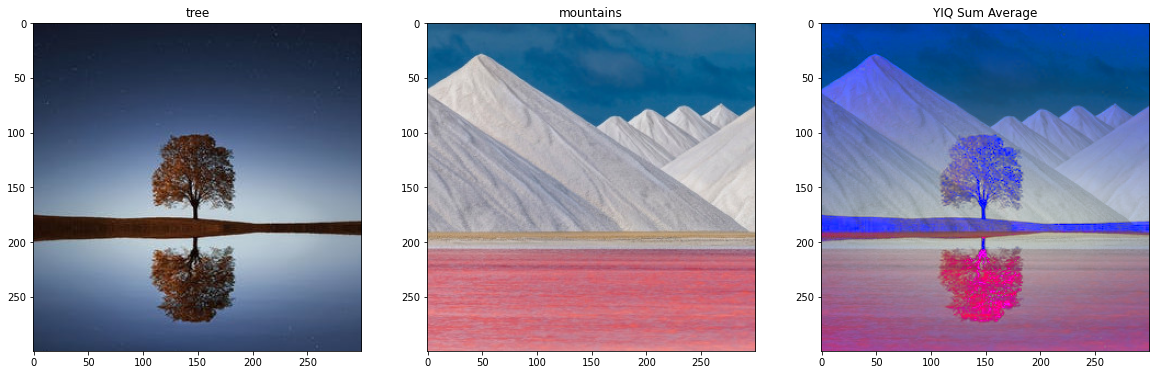

In [10]:
#@title YIQ Sum Operations { run: "auto" }

image1 = "tree" #@param ["tree","jupiter","water","dunes","mountains"]
image2 = "mountains" #@param ["tree","jupiter","water","dunes","mountains"]
operation = "Average" #@param ["Clipping","Average"]

outputs = {}

# Load images
outputs[image1] = get_image(image1)
outputs[image2] = get_image(image2)

# Operation description
output = "YIQ Sum " + operation

# Select operation
if operation == "Clipping":
  outputs[output] = sum_yiq_clip(outputs[image1],outputs[image2]) 

if operation == "Average":
  outputs[output] = sum_yiq_avg(outputs[image1],outputs[image2]) 

plot_outputs(outputs)

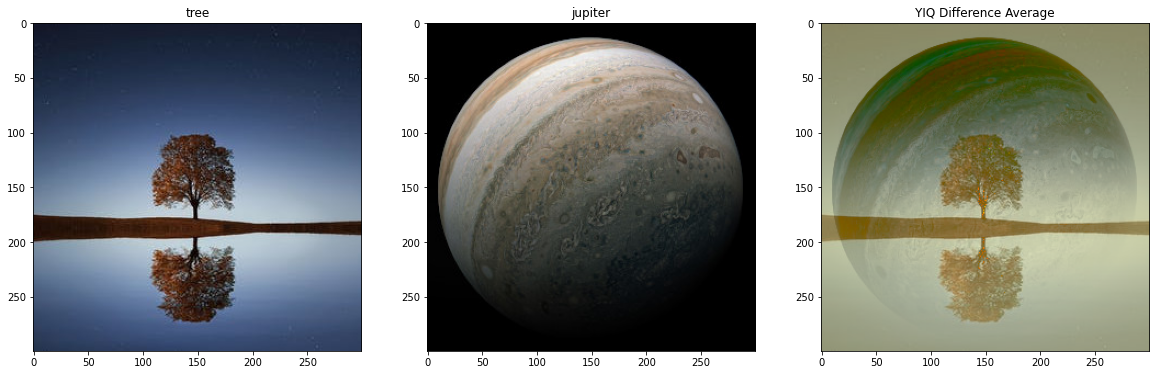

In [21]:
#@title YIQ Difference Operations { run: "auto" }

image1 = "tree" #@param ["tree","jupiter","water","dunes","mountains"]
image2 = "jupiter" #@param ["tree","jupiter","water","dunes","mountains"]
operation = "Average" #@param ["Clipping","Average"]

outputs = {}

# Load images
outputs[image1] = get_image(image1)
outputs[image2] = get_image(image2)

# Operation description
output = "YIQ Difference " + operation

# Select operation
if operation == "Clipping":
  outputs[output] = diff_yiq_clip(outputs[image1],outputs[image2]) 

if operation == "Average":
  outputs[output] = diff_yiq_avg(outputs[image1],outputs[image2]) 

plot_outputs(outputs)

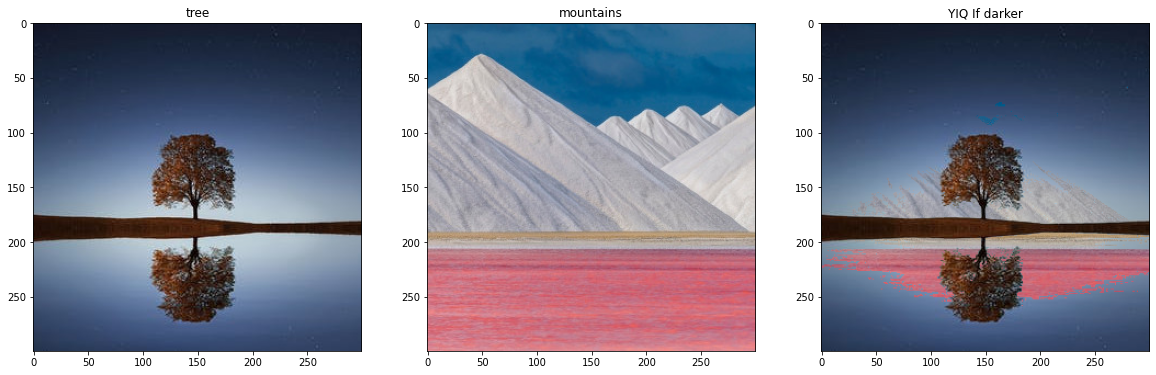

In [12]:
#@title Other YIQ Operations { run: "auto" }

image1 = "tree" #@param ["tree","jupiter","water","dunes","mountains"]
image2 = "mountains" #@param ["tree","jupiter","water","dunes","mountains"]
operation = "If darker" #@param ["If lighter","If darker"]

outputs = {}

# Load images
outputs[image1] = get_image(image1)
outputs[image2] = get_image(image2)

# Operation description
output = "YIQ " + operation

# Select operation
if operation == "If lighter":
  outputs[output] = sum_yiq_il(outputs[image1],outputs[image2]) 

if operation == "If darker":
  outputs[output] = sum_yiq_id(outputs[image1],outputs[image2]) 

plot_outputs(outputs)

#Conclusions

We have explored different pixel to pixel arithmetic operations between two images.

As a general rule, we observed that sum operations tend to increase image luminance, while difference operations reduce it. 
[Sum](https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/out/Output_tree_dunes_RGB%20Sum%20Clipping.png) / [Diff](https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/out/Output_tree_dunes_RGB%20Difference%20Clipping.png)

Both operations can give as a result pixel values that exceed or fall below the normal pixel value limits (i.e. 0 to 255 for unsigned 8 bit pixel values) producing loss of color information.

In order to prevent this, prescaling the images to the half of their normal range allows to perform the operation within normal pixel values, with a slight loss of luminance. The results give smoother gradients, with a more natural feeling. [Clipping](https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/out/Output_tree_dunes_RGB%20Sum%20Clipping.png) / [Averaging](https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/out/Output_tree_dunes_RGB%20Sum%20Average.png)

We explored operations in both RGB and YIQ spaces. The operations (sum and difference) applied to the luminance channel used were identical to the ones used in RBG channels (including averaging or clipping variants), while applying a geometric mean in the chrominance channels. 
The results in YIQ space gave a more artificial result than the RGB perations, but highlighted better the dominating chrominance between both images. [RGB](https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/out/Output_tree_mountains_RGB%20Sum%20Average.png) / [YIQ](https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/out/Output_tree_mountains_YIQ%20Sum%20Average.png) 

In addition to regular sums and differences, the if lighter/darker operation allowed to combine image sections with different luminance properties by taking the pixel values of the most light or dark pixel (depending the selected operation). The result is less smooth, but can be useful if the images are very region-wise different. Another benefit of this approach is that color information is preserved completely. [If Lighter](https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/out/Output_tree_water_YIQ%20If%20lighter.png) / [If Darker](https://github.com/fares-mldev/uns-pdi2021/raw/main/tp3/out/Output_tree_mountains_YIQ%20If%20darker.png) 





